# IMPORT DATA

In [1]:
# import library

import pandas as pd 

import os 

# Read file name in folder 

files=[file for file in os.listdir(r'E:\Python\checkUOM_DL_BB')] 

for file in files: 
    
    print(file)

dataSales_thang1.xlsx
dataSales_thang2.xlsx
dataSales_thang3.xlsx
dataSales_thang4.xlsx
dataSales_thang5.xlsx
detection.png
Price anomaly detection - Jupyter Notebook.html
Price anomaly detection - Jupyter Notebook_files


In [2]:
#import modules
import glob

# path of the folder
path = r'E:\Python\checkUOM_DL_BB'

# reading all the excel files
filenames = glob.glob(path + "\*.xlsx")
print('File names:', filenames)

# initializing empty data frame
finalexcelsheet = pd.DataFrame()

# to iterate excel file one by one
# inside the folder
for file in filenames:
    # combining multiple excel worksheets
    # into single data frames
    df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True, sort=False)

    # appending excel files one by one
    finalexcelsheet = finalexcelsheet.append(
    df, ignore_index=True)
    



# to print the combined data
print('Final Sheet:')
display(finalexcelsheet)

finalexcelsheet.to_excel(r'Final.xlsx', index=False)

File names: ['E:\\Python\\checkUOM_DL_BB\\dataSales_thang1.xlsx', 'E:\\Python\\checkUOM_DL_BB\\dataSales_thang2.xlsx', 'E:\\Python\\checkUOM_DL_BB\\dataSales_thang3.xlsx', 'E:\\Python\\checkUOM_DL_BB\\dataSales_thang4.xlsx', 'E:\\Python\\checkUOM_DL_BB\\dataSales_thang5.xlsx']
Final Sheet:


,số hóa đơn/ chứng từ,ngày xuất,mã KH npp,mã KH bb,tên khách hàng,mã hàng BB,tên hàng,đơn vị bán,số lượng theo đơn vị bán,đơn giá,doanh số
0,1,2022-01-20,customer1,NaN,Bệnh viện 1,product1,a,can,100,170000,17000000
1,2,2022-01-21,customer2,NaN,Trung tâm a,product2,b,chai,50,77000,3850000
2,3,2022-01-22,customer3,NaN,phòng khám đa khoa V,product3,c,thùng,30,141000,4230000
3,4,2022-01-23,customer4,NaN,viện t,product4,d,can,200,172000,34400000
4,5,2022-01-24,customer5,NaN,thẩm mĩ e,product5,e,thùng,50,135000,6750000
...,...,...,...,...,...,...,...,...,...,...,...
78,13,2022-05-25,customer13,NaN,kho hàng r,product13,s,can,50,187000,9350000
79,14,2022-05-26,customer14,NaN,phòng khám bác sĩ h,product14,x,bộ,40,155000,5640000
80,15,2022-05-24,customer15,NaN,công ty trang thiết bị y tế k,product15,z,thùng,30,37000,990000
81,16,2022-05-25,customer16,NaN,viện o,product16,m,thùng,60,50000,3300000


In [3]:
all_data=pd.read_excel(r'Final.xlsx')

In [4]:
all_data.head(100)

,số hóa đơn/ chứng từ,ngày xuất,mã KH npp,mã KH bb,tên khách hàng,mã hàng BB,tên hàng,đơn vị bán,số lượng theo đơn vị bán,đơn giá,doanh số
0,1,2022-01-20,customer1,NaN,Bệnh viện 1,product1,a,can,100,170000,17000000
1,2,2022-01-21,customer2,NaN,Trung tâm a,product2,b,chai,50,77000,3850000
2,3,2022-01-22,customer3,NaN,phòng khám đa khoa V,product3,c,thùng,30,141000,4230000
3,4,2022-01-23,customer4,NaN,viện t,product4,d,can,200,172000,34400000
4,5,2022-01-24,customer5,NaN,thẩm mĩ e,product5,e,thùng,50,135000,6750000
...,...,...,...,...,...,...,...,...,...,...,...
78,13,2022-05-25,customer13,NaN,kho hàng r,product13,s,can,50,187000,9350000
79,14,2022-05-26,customer14,NaN,phòng khám bác sĩ h,product14,x,bộ,40,155000,5640000
80,15,2022-05-24,customer15,NaN,công ty trang thiết bị y tế k,product15,z,thùng,30,37000,990000
81,16,2022-05-25,customer16,NaN,viện o,product16,m,thùng,60,50000,3300000


In [5]:
# add month column
import datetime as dt
all_data['Month']=pd.DatetimeIndex(all_data['ngày xuất']).month

### REMOVE ACCENTS

In [6]:
# import library to remove accents
!pip install Unidecode
import unidecode

In [7]:
new_columnName=[]
list=all_data.columns.values.tolist()
for i in range(len(list)):
    item=unidecode.unidecode(list[i])
    new_columnName.append(item)
print(new_columnName)

[' so hoa don/ chung tu', 'ngay xuat', 'ma KH npp', 'ma KH bb', 'ten khach hang', 'ma hang BB', 'ten hang', 'don vi ban', 'so luong theo don vi ban', 'don gia', 'doanh so', 'Month']


In [8]:
column_indices = []
for i in range(len(list)):
    index=i
    column_indices.append(index)
old_names = all_data.columns[column_indices]
all_data.rename(columns=dict(zip(old_names, new_columnName)), inplace=True)
all_data.head(5)

,so hoa don/ chung tu,ngay xuat,ma KH npp,ma KH bb,ten khach hang,ma hang BB,ten hang,don vi ban,so luong theo don vi ban,don gia,doanh so,Month
0,1,2022-01-20,customer1,NaN,Bệnh viện 1,product1,a,can,100,170000,17000000,1
1,2,2022-01-21,customer2,NaN,Trung tâm a,product2,b,chai,50,77000,3850000,1
2,3,2022-01-22,customer3,NaN,phòng khám đa khoa V,product3,c,thùng,30,141000,4230000,1
3,4,2022-01-23,customer4,NaN,viện t,product4,d,can,200,172000,34400000,1
4,5,2022-01-24,customer5,NaN,thẩm mĩ e,product5,e,thùng,50,135000,6750000,1


In [9]:
data_copy=all_data.copy()


In [10]:
# remove accents
data_copy.replace({'[éèẻẽẹêếềểễệ]': 'e','[ÚÙỦŨỤƯỨỪỬỮỰ]': 'U','[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]': 'A','[ÉÈẺẼẸÊẾỀỂỄỆ]': 'E',
                  '[óòỏõọôốồổỗộơớờởỡợ]': 'o','[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]': 'O','[íìỉĩị]': 'i','[ÍÌỈĨỊ]': 'I',
                  '[úùủũụưứừửữự]': 'u','[ýỳỷỹỵ]': 'y','đ': 'd','[ÝỲỶỸỴ]': 'Y','Đ': 'D'}, regex=True, inplace=True)



In [11]:
data_copy['ten khach hang'] = data_copy['ten khach hang'].apply(lambda x:x.lower())
data_copy.head(5)

,so hoa don/ chung tu,ngay xuat,ma KH npp,ma KH bb,ten khach hang,ma hang BB,ten hang,don vi ban,so luong theo don vi ban,don gia,doanh so,Month
0,1,2022-01-20,customer1,NaN,benh vien 1,product1,a,can,100,170000,17000000,1
1,2,2022-01-21,customer2,NaN,trung tâm a,product2,b,chai,50,77000,3850000,1
2,3,2022-01-22,customer3,NaN,phong khám da khoa v,product3,c,thung,30,141000,4230000,1
3,4,2022-01-23,customer4,NaN,vien t,product4,d,can,200,172000,34400000,1
4,5,2022-01-24,customer5,NaN,thẩm mi e,product5,e,thung,50,135000,6750000,1


# MAPPING DATA

In [12]:
master_data=pd.read_excel(r'E:\Python\Master_data.xlsx')

In [13]:
data = pd.merge(all_data, master_data, left_on='ma hang BB',right_on='Product ID',how='left',suffixes=('_left','_right'))
data.head(5)

,so hoa don/ chung tu,ngay xuat,ma KH npp,ma KH bb,ten khach hang,ma hang BB,ten hang,don vi ban,so luong theo don vi ban,don gia,doanh so,Month,Product ID,Price
0,1,2022-01-20,customer1,NaN,Bệnh viện 1,product1,a,can,100,170000,17000000,1,product1,170000
1,2,2022-01-21,customer2,NaN,Trung tâm a,product2,b,chai,50,77000,3850000,1,product2,77000
2,3,2022-01-22,customer3,NaN,phòng khám đa khoa V,product3,c,thùng,30,141000,4230000,1,product3,141000
3,4,2022-01-23,customer4,NaN,viện t,product4,d,can,200,172000,34400000,1,product4,172000
4,5,2022-01-24,customer5,NaN,thẩm mĩ e,product5,e,thùng,50,135000,6750000,1,product5,135000


In [14]:
# check unmapping data
data.isna().sum()

 so hoa don/ chung tu        0
ngay xuat                    0
ma KH npp                    0
ma KH bb                    83
ten khach hang               0
ma hang BB                   0
ten hang                     0
don vi ban                   0
so luong theo don vi ban     0
don gia                      0
doanh so                     0
Month                        0
Product ID                   0
Price                        0
dtype: int64

# PRICING TREND

In [15]:
import numpy as np
PriceByMonth=pd.pivot_table(data,index=['Month'],columns='ma hang BB',values=['don gia'], aggfunc=np.mean)

In [16]:
with pd.option_context('display.max_rows', None,):
    print(PriceByMonth.round(0))


             don gia                                                    \
ma hang BB  product1 product10 product11 product12 product13 product14   
Month                                                                    
1           170000.0  104000.0  105000.0   43000.0  187000.0  141000.0   
2           175000.0  105000.0  100000.0   50000.0  183333.0       NaN   
3            44000.0  100800.0  108000.0   41000.0  188000.0  142000.0   
4           175000.0  114000.0  125000.0   55000.0  167000.0   11000.0   
5           172000.0  100000.0  100000.0   48000.0  187000.0  155000.0   

                                                                       \
ma hang BB product15 product16 product17 product2  product3  product4   
Month                                                                   
1            33000.0   55000.0  194000.0  77000.0  141000.0  172000.0   
2            40000.0   45000.0       NaN  80000.0       NaN  170000.0   
3            34000.0   56000.0  199000.0  

In [17]:
list=[] 

list=PriceByMonth.columns.values.tolist() 
print(list)

[('don gia', 'product1'), ('don gia', 'product10'), ('don gia', 'product11'), ('don gia', 'product12'), ('don gia', 'product13'), ('don gia', 'product14'), ('don gia', 'product15'), ('don gia', 'product16'), ('don gia', 'product17'), ('don gia', 'product2'), ('don gia', 'product3'), ('don gia', 'product4'), ('don gia', 'product5'), ('don gia', 'product6'), ('don gia', 'product7'), ('don gia', 'product8'), ('don gia', 'product9')]


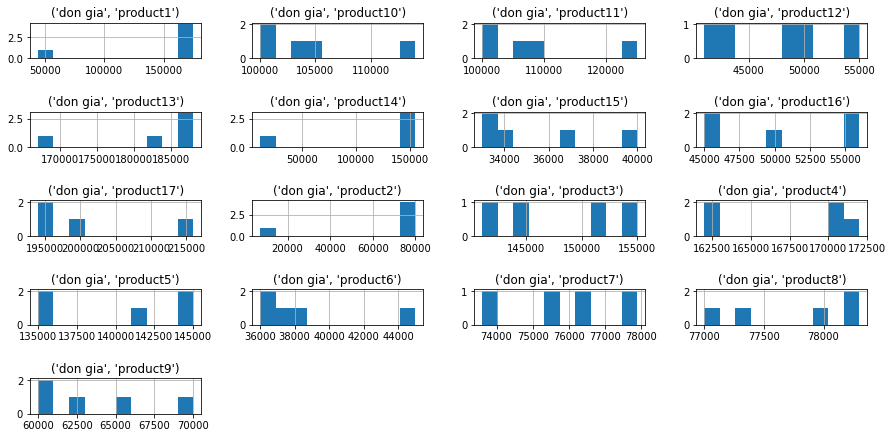

In [18]:
import matplotlib.pyplot as plt
PriceByMonth[list].hist(figsize=(15,35), layout=(22, 4));
plt.subplots_adjust(hspace=1.5) #khoang cach giua cac chart


# DETECT ANOMALY PRICE 

In [19]:
data['75%_price_BB']=data['Price']*0.75
data['125%_price_BB']=data['Price']*1.25

In [20]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data_display=data[['ma hang BB','don gia','75%_price_BB','125%_price_BB']]


In [22]:
list=data_display['ma hang BB'].unique().tolist()
list[0:10]

['product1',
 'product2',
 'product3',
 'product4',
 'product5',
 'product6',
 'product7',
 'product8',
 'product9',
 'product10']

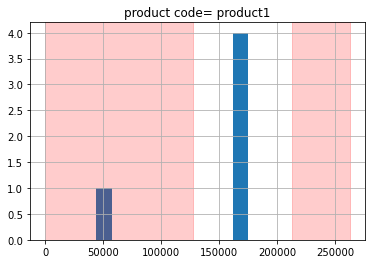

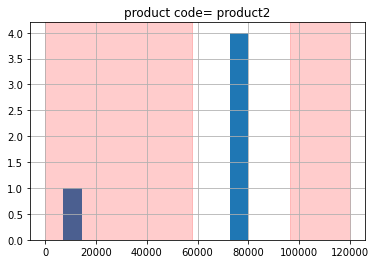

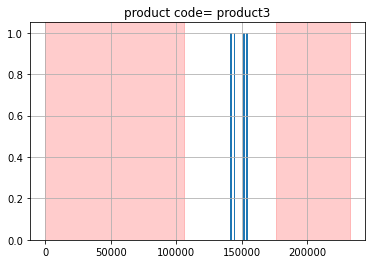

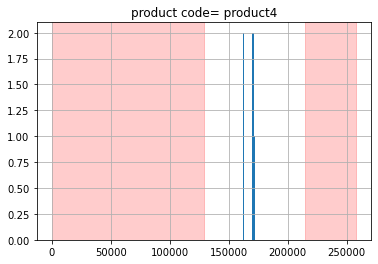

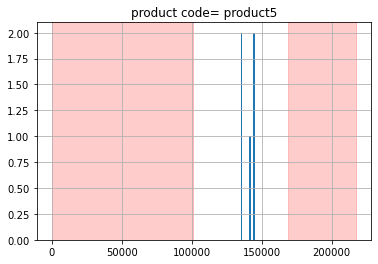

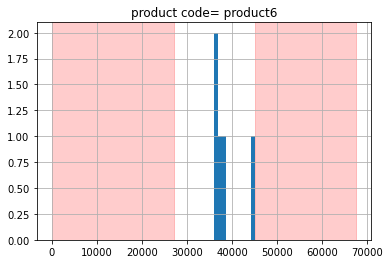

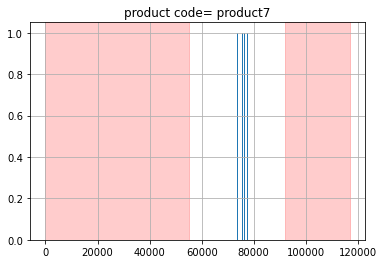

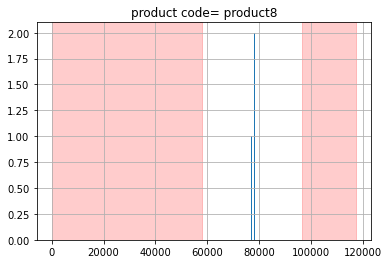

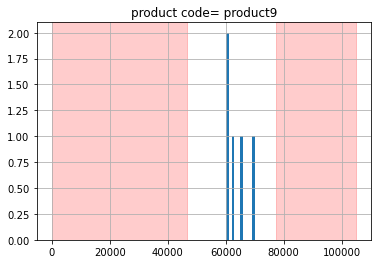

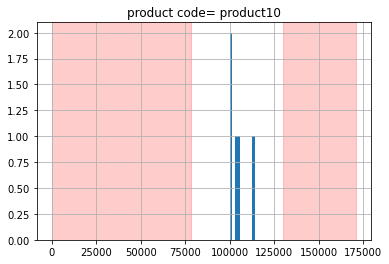

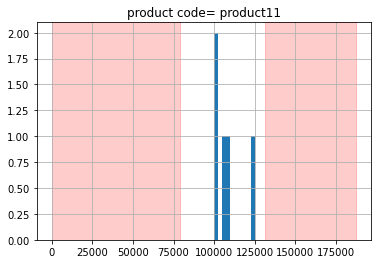

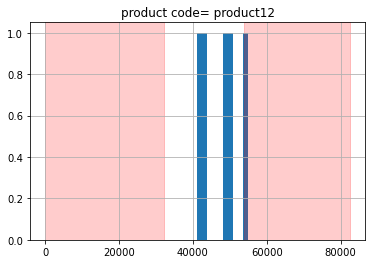

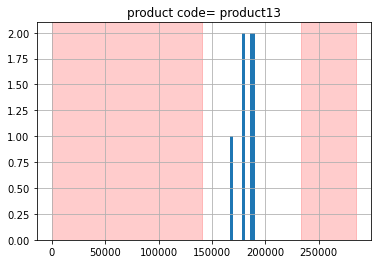

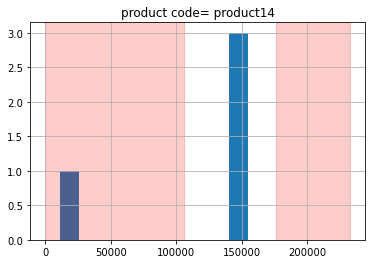

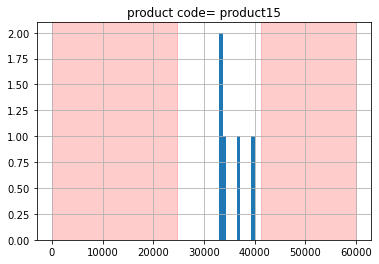

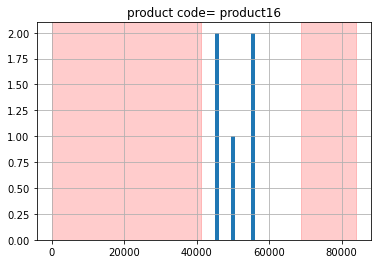

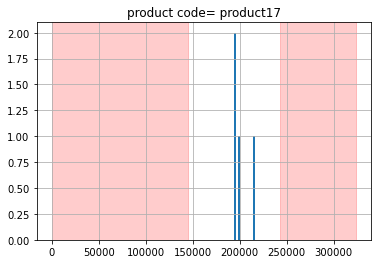

In [23]:
for i in range(len(list)):
    df=data_display.loc[data_display['ma hang BB']==list[i]]
    ax = df['don gia'].hist()
    plt.axvspan(0 ,df['75%_price_BB'].min(),alpha=0.2, color='r') #alpha là tranparent
    plt.axvspan(df['125%_price_BB'].max() ,df['don gia'].max()*1.5,alpha=0.2, color='r') #alpha là tranparent
    plt.title("product code= "+list[i])
    plt.show()